In [1]:
# 그래프 출력 관련 설정
# 아래 코드는 그래프를 그리고 싶을때 그대로 가져다가 한번 실행시켜주면 편합니다.
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

sns.set_style("darkgrid")

%config InlineBackend.figure_format = 'retina'
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 표시 문제
mpl.rcParams['figure.figsize'] = (15,8)
	
# 한글 폰트 설정
path = 'data/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
# fm._rebuild() => Colab에서는 이 코드도 실행해주세요

In [2]:
# 엑셀 등의 데이터를 편리하게 다룰수 있는 pandas 라이브러리
import pandas as pd

In [3]:
# pandas의 read_csv 함수를 사용해서 'data.csv' 파일을 읽어옵니다.
# 'data.csv'데이터는 한국거래소(KRX)에서 가져온 코스피200 데이터 입니다.
코스피200 = pd.read_csv('data/data.csv', encoding='cp949')

In [4]:
# 데이터가 어떻게 구성되어있는지 3개만 확인해보겠습니다
코스피200.head(3)

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2022/10/05,289.05,0.78,0.27,293.87,294.47,287.44,138907.0,7289051.0,1.528199e+09
1,2022/10/04,288.27,6.91,2.46,286.25,288.96,285.42,120019.0,6053599.0,1.522329e+09
2,2022/09/30,281.36,-1.29,-0.46,281.75,284.35,278.39,143738.0,6233068.0,1.485352e+09


In [5]:
# 결측치(셀에 값이 없음)를 제거합니다.
코스피200 = 코스피200.dropna()

# 데이터를 그대로 뿌리면, 최근일자부터 그래프가 그려져서
# 일자별로 정렬해서 데이터프레임을 다시 저장했습니다.
코스피200 = 코스피200.sort_values('일자')

In [6]:
# 그래프의 x축에 쓸 글자(라벨) 만들기
label_x = 코스피200['일자'].loc[[ i for i in range(0, len(코스피200), 365) ]].to_list()

In [7]:
# 일자를 기준으로 컬럼의 lineplot을 그려주는 함수 만들기
def show_graph(column_name, col_sub1=None, col_sub2=None):
    g = sns.lineplot(x=코스피200['일자'], y=코스피200[column_name])
    g.set_xticks(label_x)
    _ = g.set_xticklabels(label_x, rotation=30)

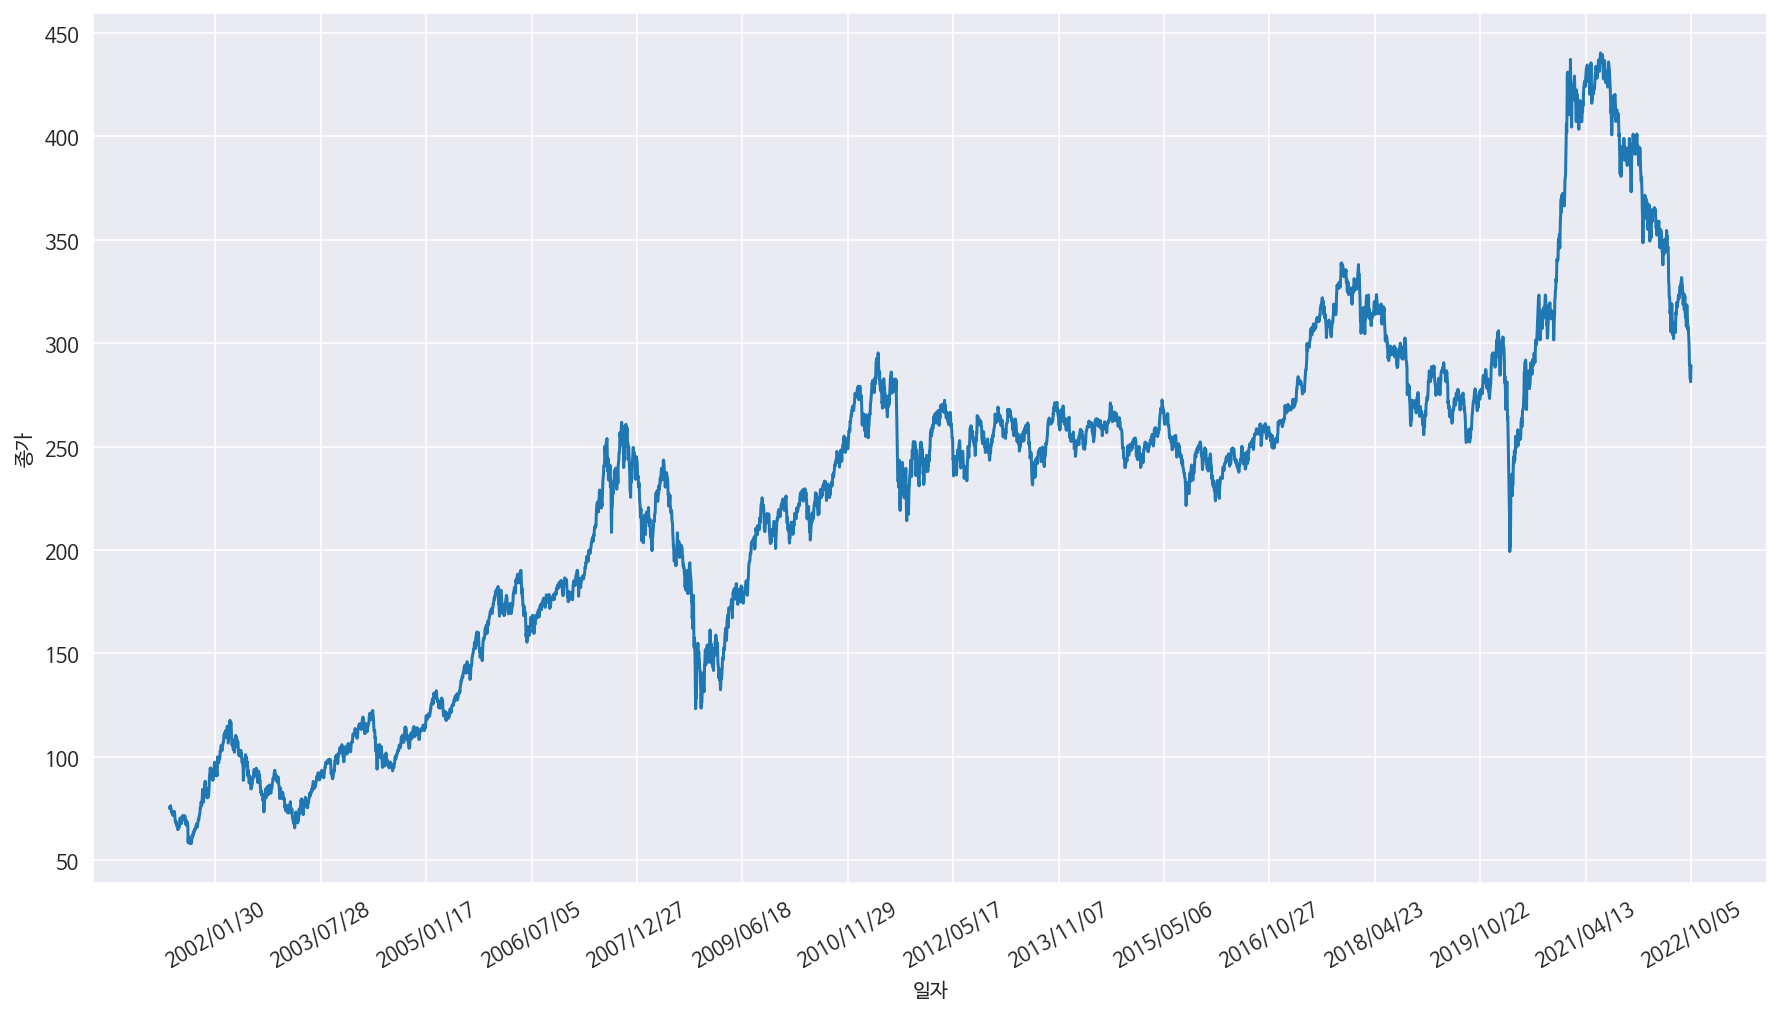

In [8]:
# 종가 기준으로 그래프를 그려보겠습니다.
# 장기적으로는 꾸준히 우상향 했는데 최근에는 하락추세네요
show_graph('종가')

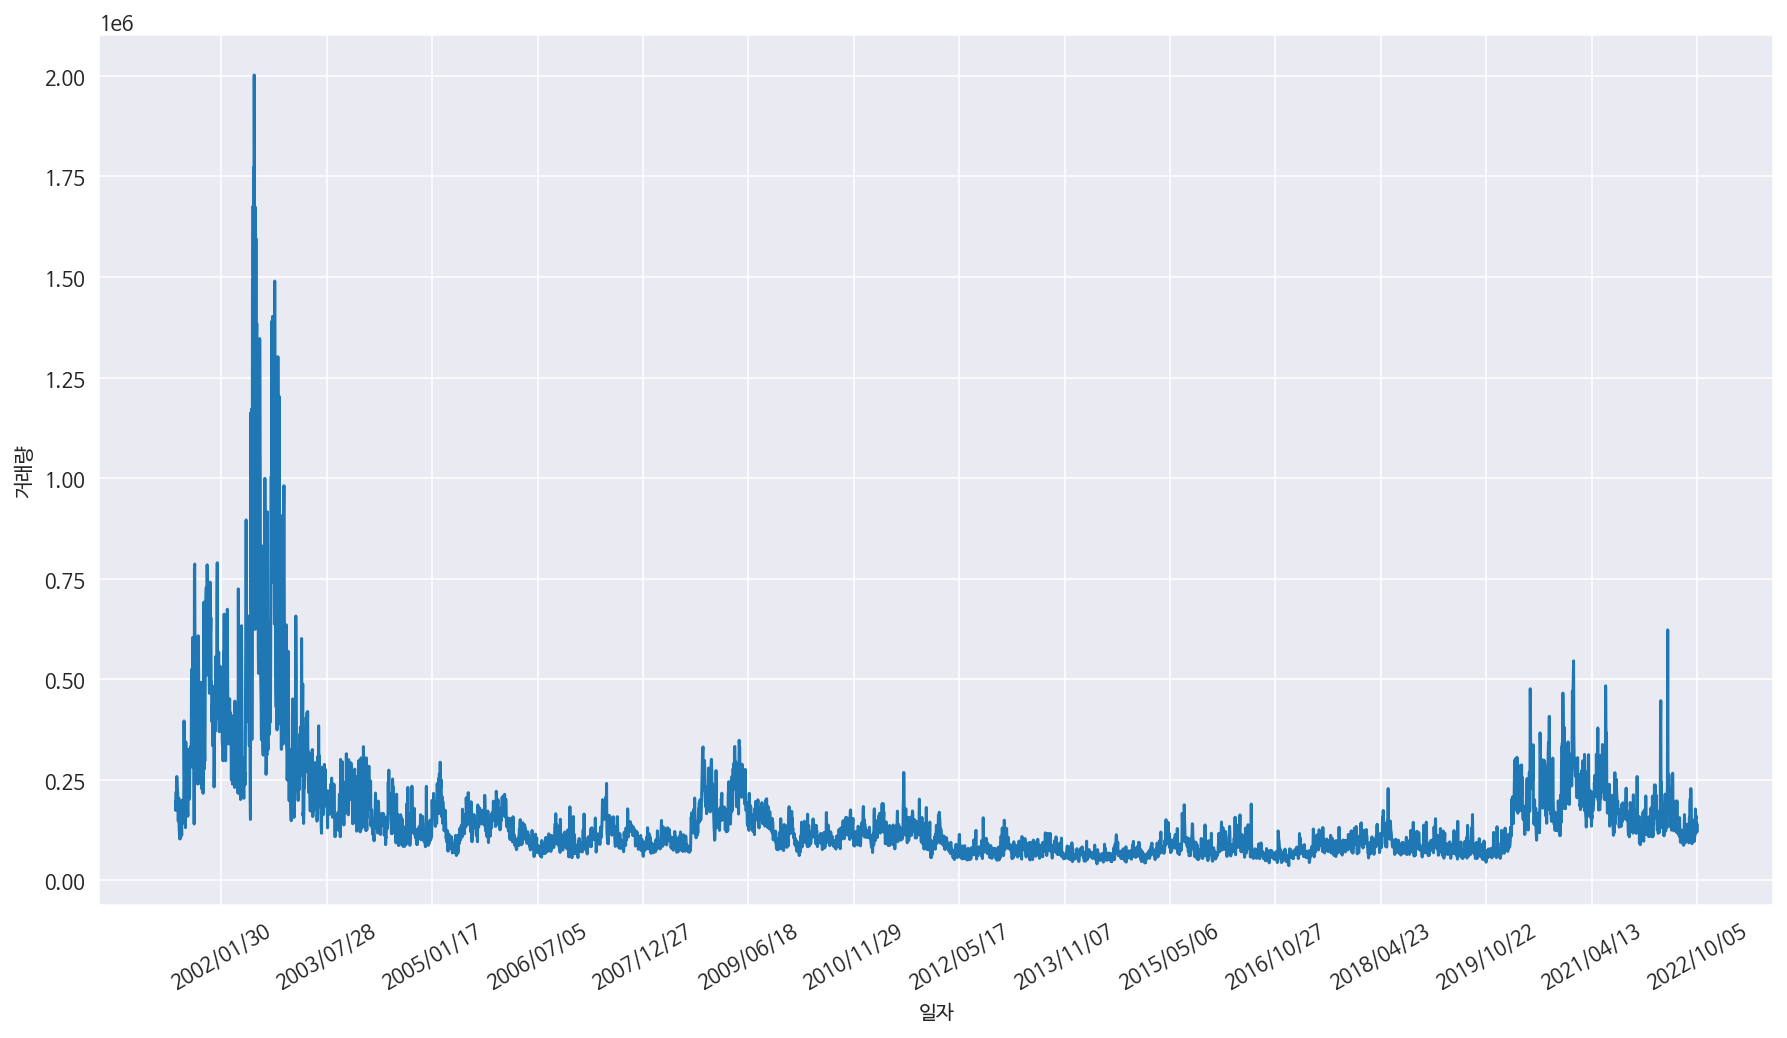

In [9]:
# 거래량 기준으로 살펴보겠습니다.
# 2000년대에 닷컴 버블이 있었다는데, 거래량이 상당했네요
# 최근들어서도 거래가 활성화 되었지만, 2000년도 만큼은 아닌 것 같습니다.
show_graph('거래량')

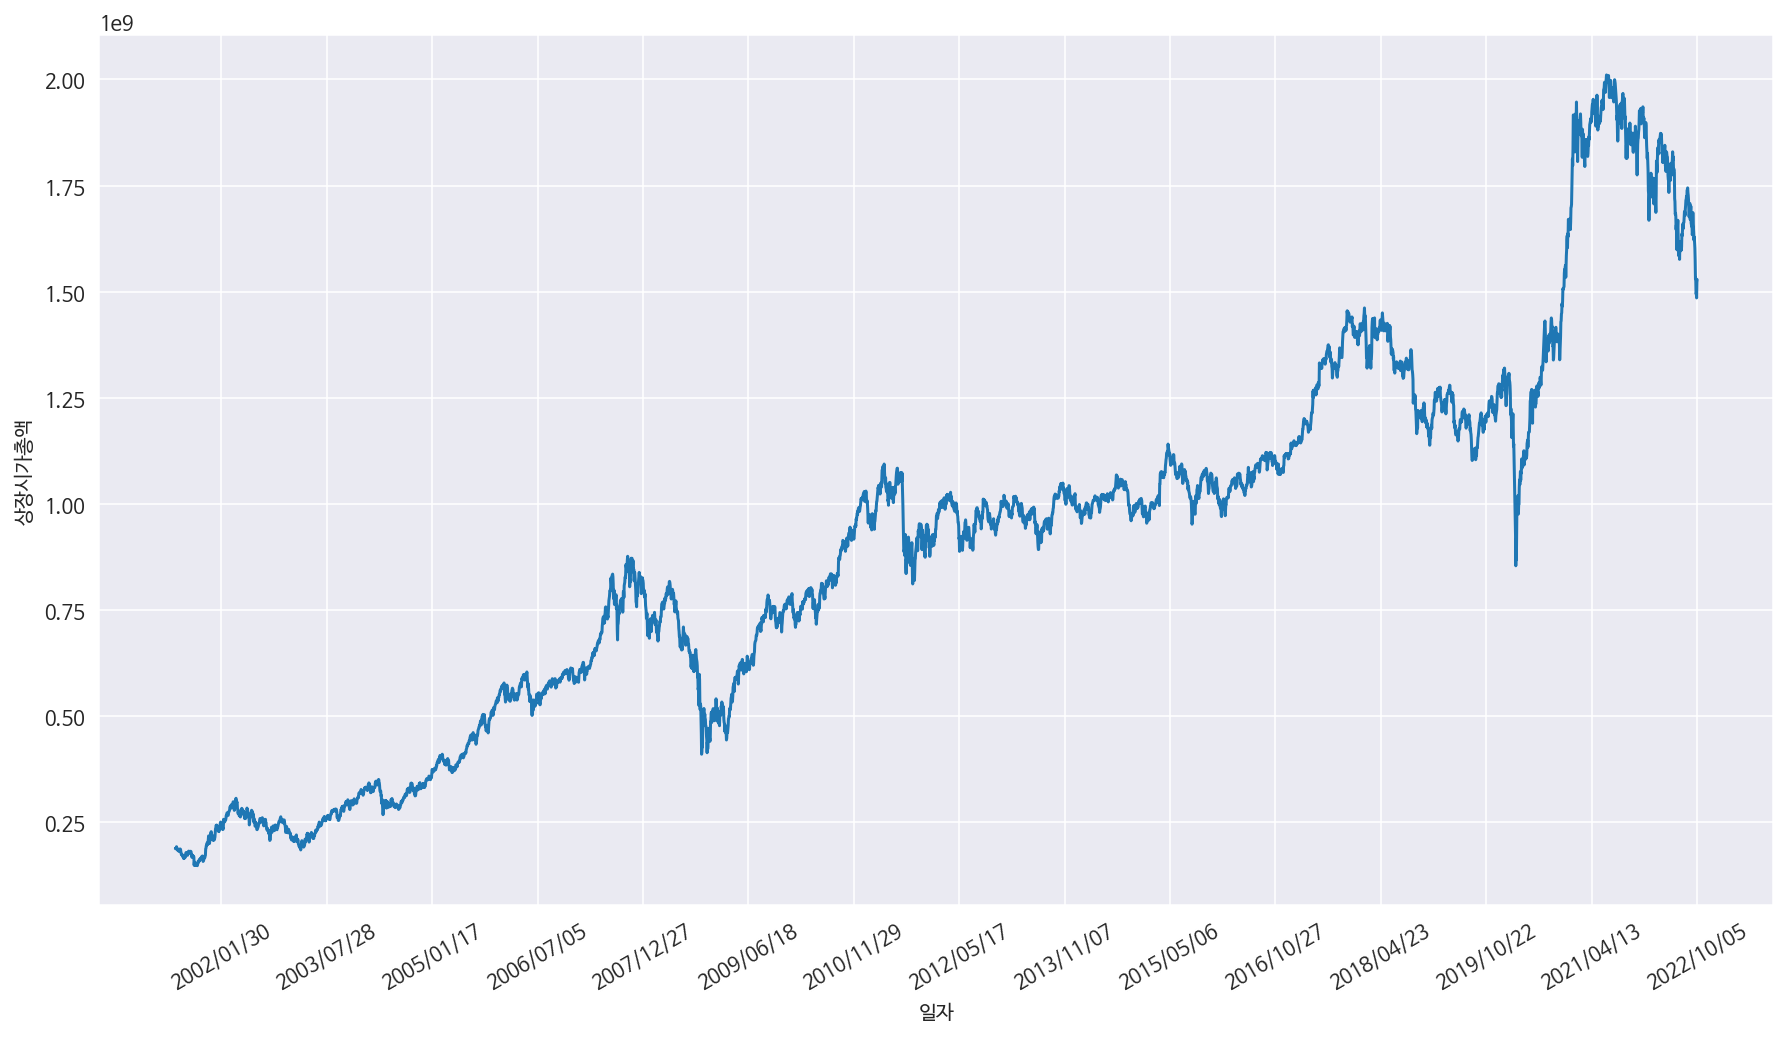

In [10]:
# 상장시가총액은 꾸준히 우상향했습니다.
show_graph('상장시가총액')

In [11]:
# 여러 데이터를 한번에 그래프에 그리는 함수를 만들었습니다.
def show_multi_plot(col_list):
    color_list = ['red', 'blue', 'green', 'yellow']
    for item in zip(col_list, color_list):
        column = item[0]
        color = item[1]
        g = sns.lineplot(x=코스피200['일자'], y=코스피200[column], label=column, color=color)
    g.set_xticks(label_x)
    _ = g.set_xticklabels(label_x, rotation=30)

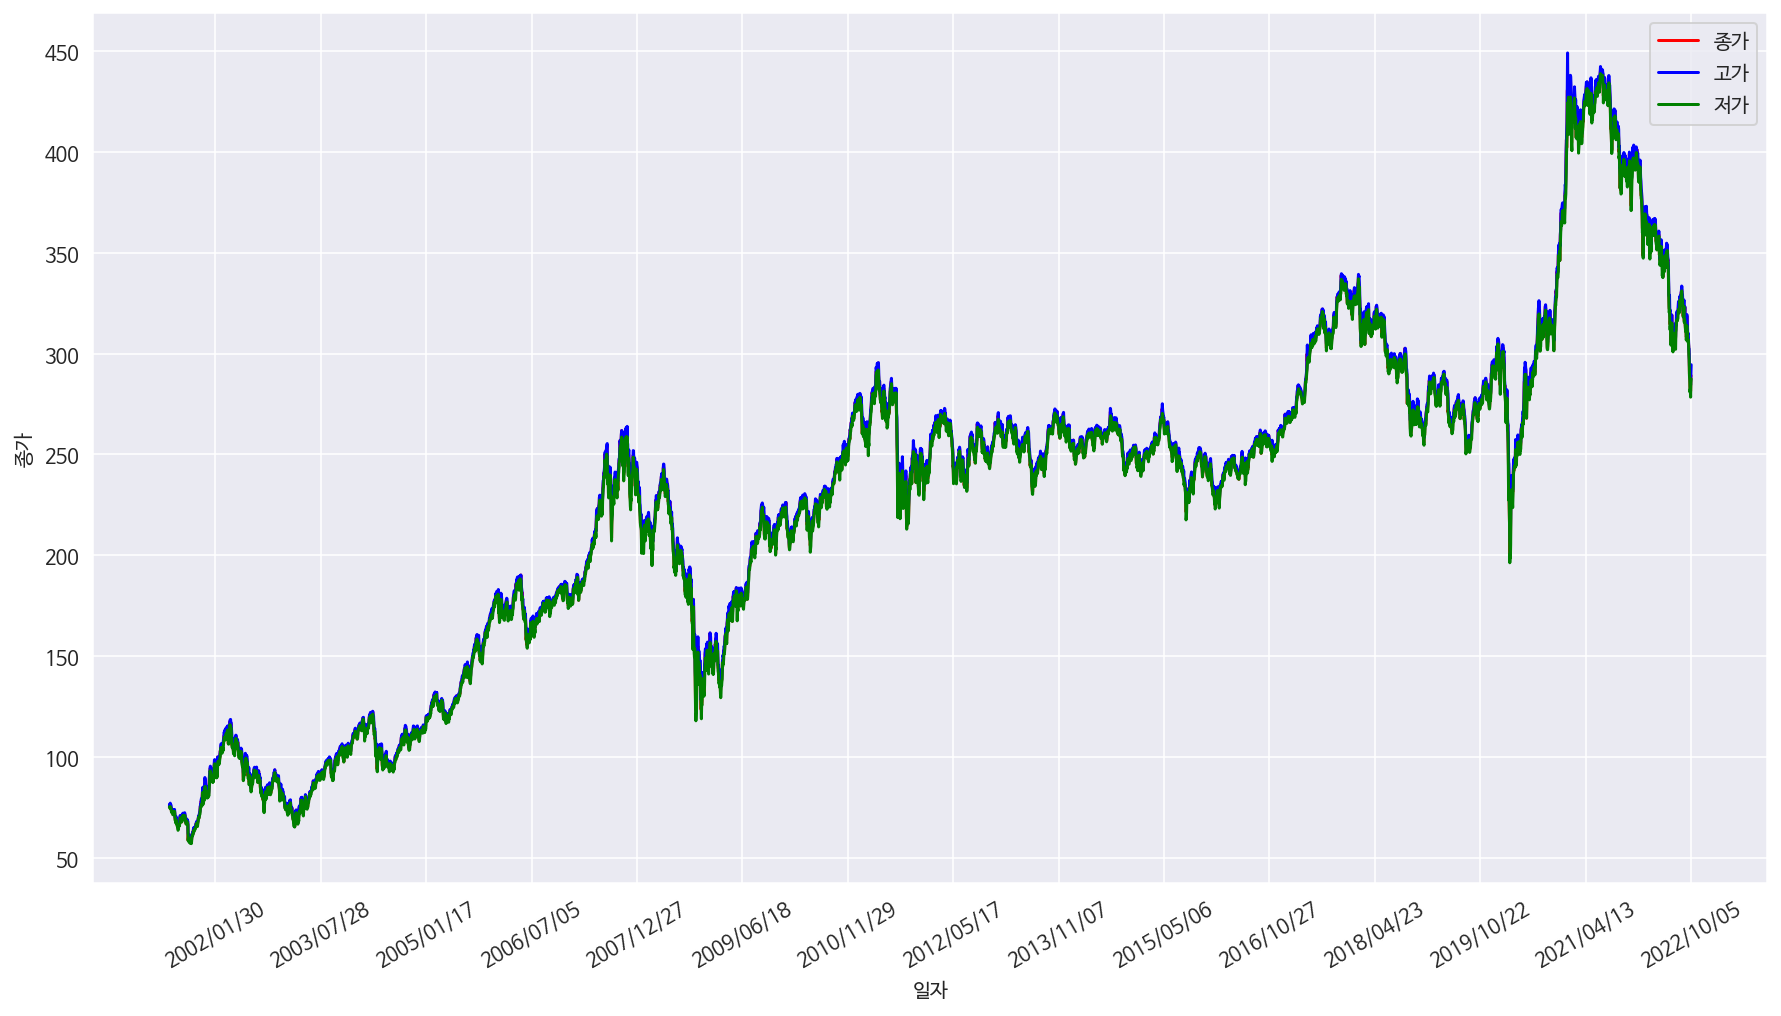

In [12]:
# 종가, 고가, 저가를 한 그래프에 뿌려보겠습니다.
show_multi_plot(['종가', '고가', '저가'])

In [13]:
# 앞서 그린 그래프는 확인하기가 힘들어서
# 일부 기간의 그래프만 확인하는 함수를 만들었습니다.
def show_multi_plot2(col_list, str_date):
    color_list = ['red', 'blue', 'green', 'yellow']
    sub_data = 코스피200[코스피200['일자'] >= str_date]

    for item in zip(col_list, color_list):
        column = item[0]
        color = item[1]
        g = sns.lineplot(x=sub_data['일자'], y=sub_data[column], label=column, color=color)

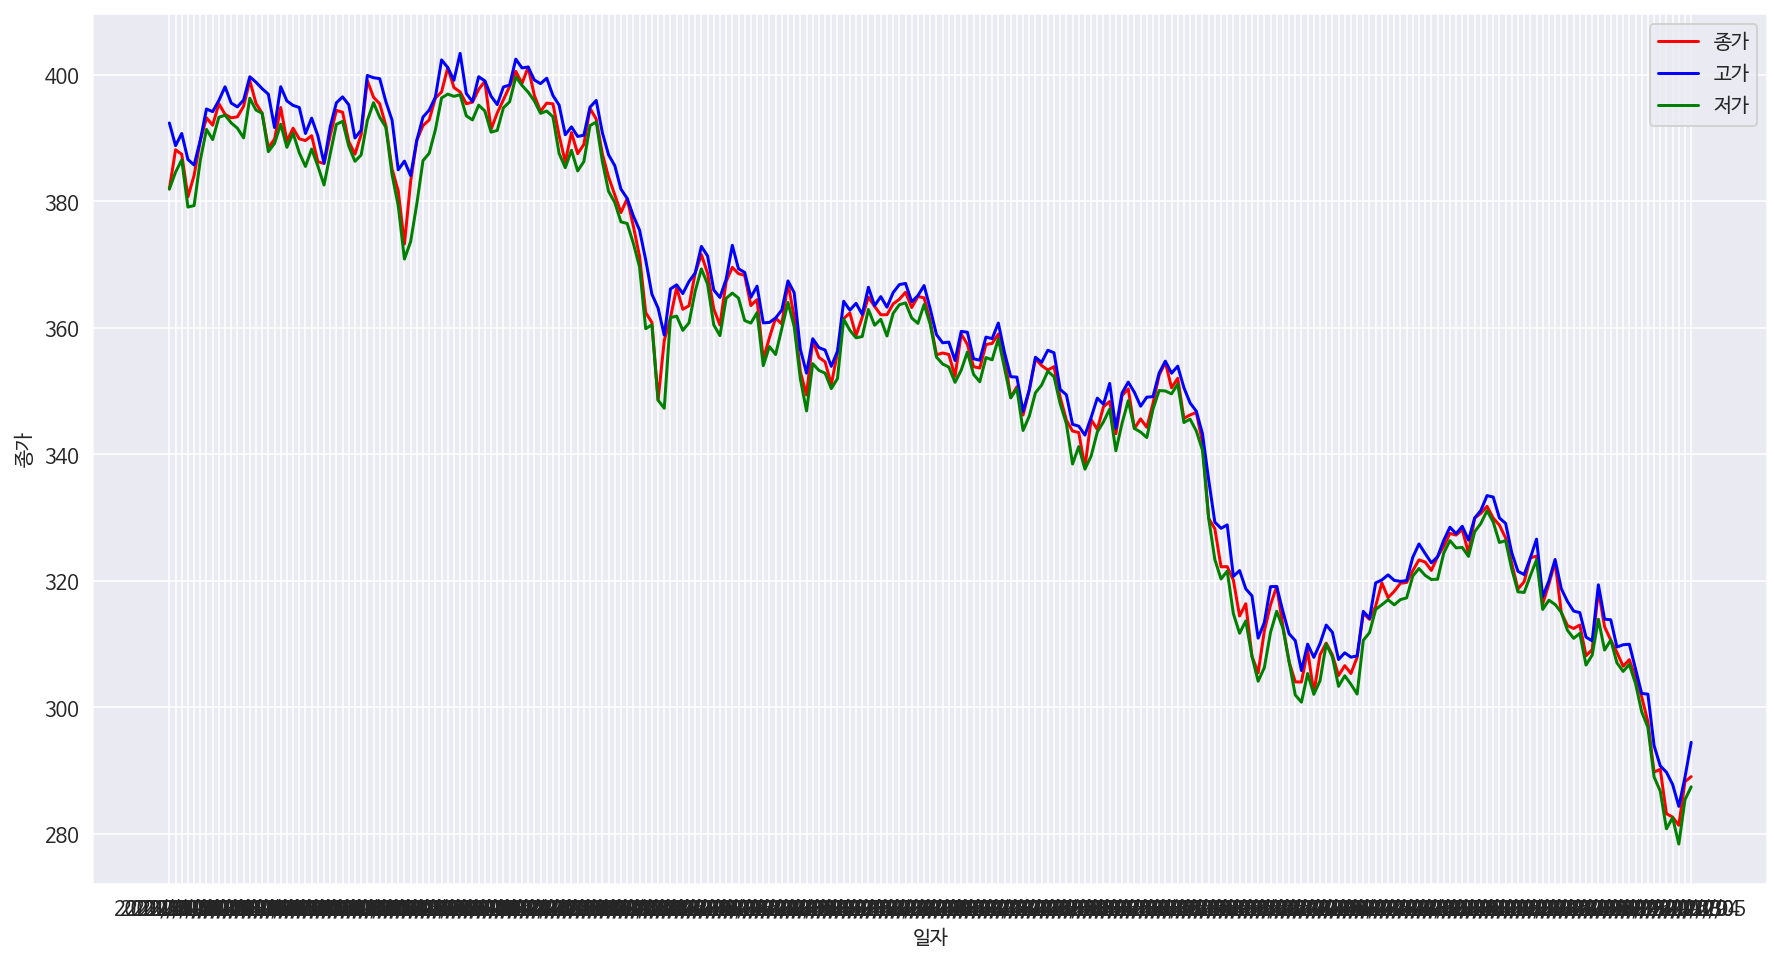

In [14]:
# 최근 1년 데이터를 그래프로 그려봤습니다.
# 1년동안 계속 빠지네요
show_multi_plot2(['종가', '고가', '저가'], '2021/10/06')

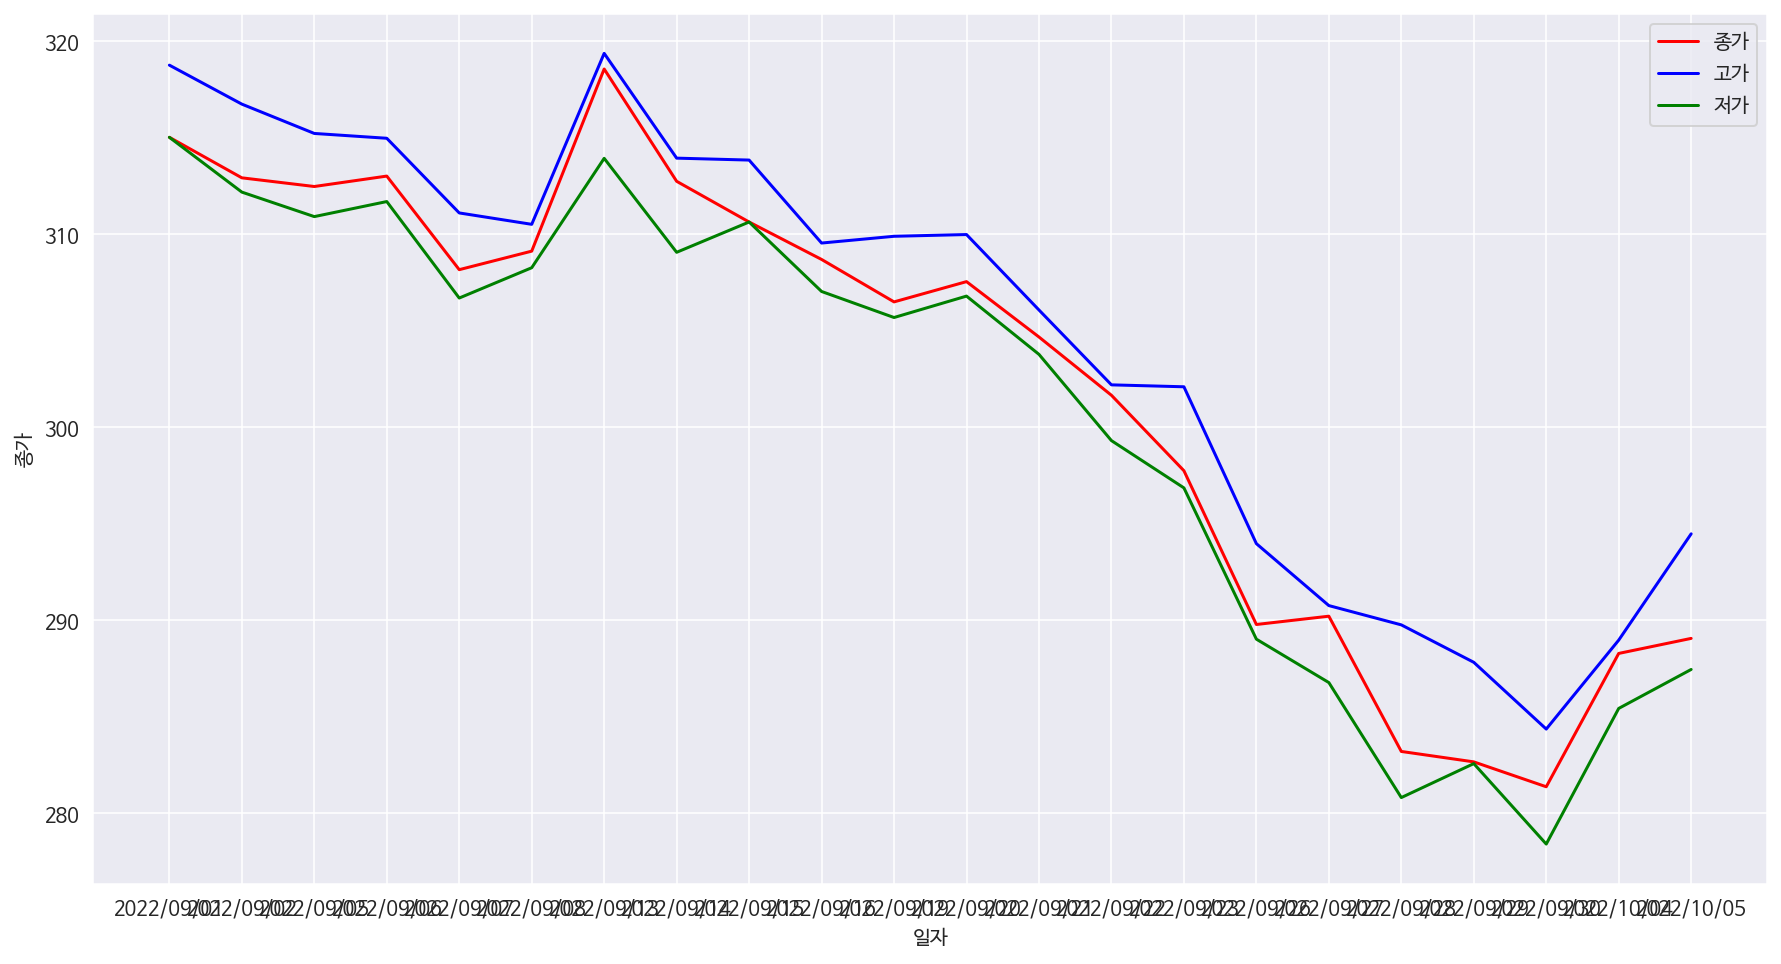

In [15]:
# 최근 한달 그래프 입니다.
# 마음도 아픈데 10월들어 나타난 상승세가 지속됐으면 좋겠습니다.
show_multi_plot2(['종가', '고가', '저가'], '2022/09/01')